---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Background:
Supposed I am employed by a large supermarket chain to perform customer segmentation analysis. In particular, I am provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

My job is to analyse the data in Python using relevant techniques, and identify customer segments given the dataset. 

## Tasks:

1. **Exploratory Data Analysis** 
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
2. **Customer Segmentation** 
    - Apply suitable clustering analysis.
    - Choose an optimal number of customer segments/clusters.  
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city.
    - How do the clusters identified by different techniques compare?
3. **Recommendations** 
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers.

<hr style="width:35%;margin-left:0;"> 

### Task 1: Exploratory data analysis

In [6]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [7]:
#read dataset 
df = pd.read_csv("Data/customer_seg_data.csv")
df.drop('ID', inplace=True, axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [8]:
df.shape

(2000, 7)

In [9]:
# check how many null values 
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [10]:
#Data summary
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


The summary shows a total of 2000 entries with the mean values of Age and Income as 36 and 120954 respectively. There are no null entries in the dataset so that we start exploratory analysis. 

#### 1.1. Univariate Analysis 

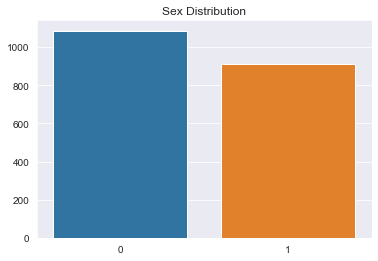

In [11]:
#Sex distribution 
sex = df.Sex.value_counts()
sns.set_style("darkgrid")
plt.title("Sex Distribution")
sns.barplot(x=sex.index, y=sex.values)
plt.show()

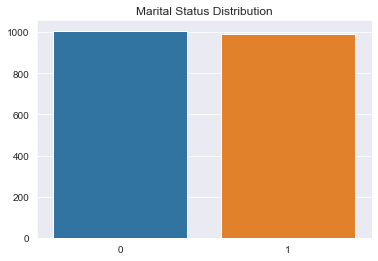

In [12]:
#Marrital status distribution 
marital = df['Marital status'].value_counts()
sns.set_style("darkgrid")
plt.title("Marital Status Distribution")
sns.barplot(x=marital.index, y=marital.values)
plt.show()

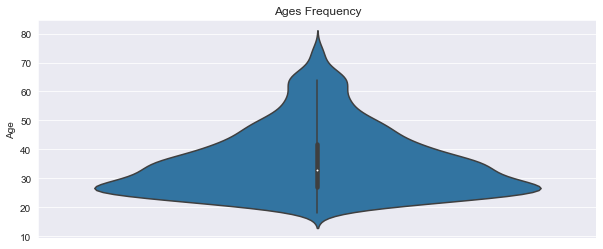

In [13]:
#Age frequency
plt.figure(figsize=(10,4))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

The 20-30 group is the most dominant one while there are fewer customers as the age gradually increases. 

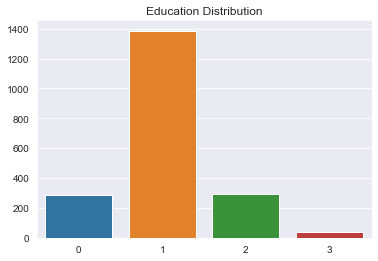

In [14]:
#Education distribution 
education = df.Education.value_counts()
sns.set_style("darkgrid")
plt.title("Education Distribution")
sns.barplot(x=education.index, y=education.values)
plt.show()

Most consumers contributing to the enterprise have completed high school with a dominant figure of 1400. 

In [15]:
#Income range
ai35_90 = df["Income"][(df["Income"] >= 35000) & (df["Income"] < 90000)]
ai90_145 = df["Income"][(df["Income"] >= 90000) & (df["Income"] < 145000)]
ai145_200 = df["Income"][(df["Income"] >= 145000) & (df["Income"] < 200000)]
ai200_255 = df["Income"][(df["Income"] >= 200000) & (df["Income"] < 255000)]
ai255_310 = df["Income"][(df["Income"] >= 255000) & (df["Income"] < 310000)]

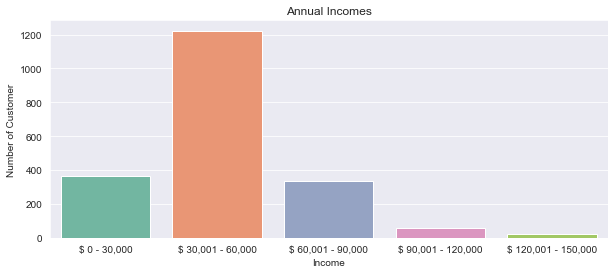

In [16]:
#Income intervals 
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai35_90.values), len(ai90_145.values), len(ai145_200.values), len(ai200_255.values), len(ai255_310.values)]

plt.figure(figsize=(10,4))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

While much of the annual incomes vary between 30 and 60,000 dollars, only a smaller number of users have fairly high earnings. This therefore indicates a great number of customers having low income.

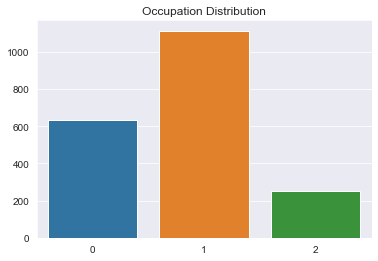

In [17]:
#Occupation distribution 
occ = df['Occupation'].value_counts()
sns.set_style("darkgrid")
plt.title("Occupation Distribution")
sns.barplot(x=occ.index, y=occ.values)
plt.show()

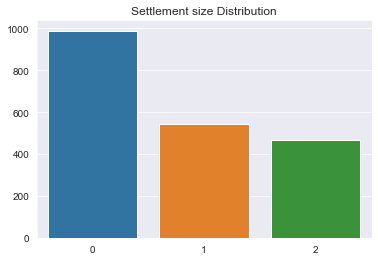

In [18]:
ss = df['Settlement size'].value_counts()
sns.set_style("darkgrid")
# plt.figure(figsize=(10,4))
plt.title("Settlement size Distribution")
sns.barplot(x=ss.index, y=ss.values)
plt.show()

#### 1.2. Bivariate Analysis

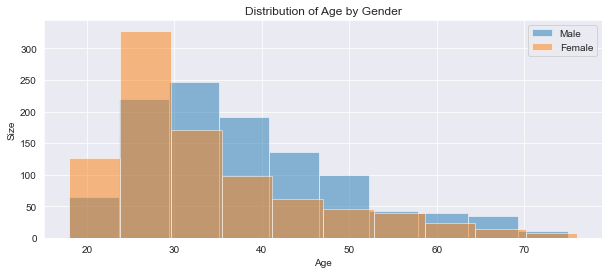

In [19]:
#Age distribution by gender
plt.figure(figsize=(10,4))
plt.hist('Age', data=df[df['Sex'] == 0], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Sex'] == 1], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.ylabel('Size')
plt.legend();

Text(0.5, 1.0, 'Scatter plot between Age and Annual Income')

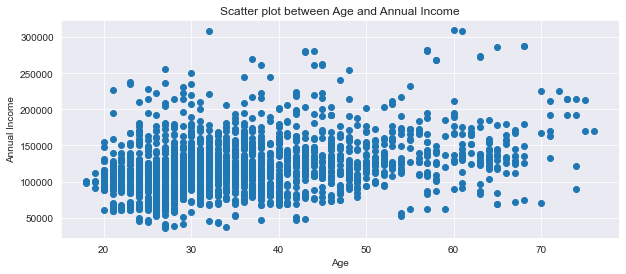

In [20]:
#Annual Income by Age
plt.figure(figsize=(10,4))
plt.scatter(df['Age'],df['Income'], marker='o');
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Scatter plot between Age and Annual Income')

#### 1.3. Multiriate Analysis

<AxesSubplot:>

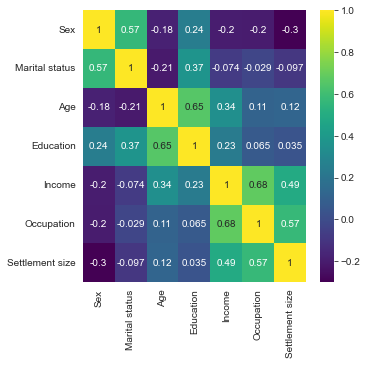

In [21]:
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

A heatmap is conducted to graphically present the correlation between features to investigate potential linear relations:
- `Age` has a moderately positive correlation with ‘Education’ which indicates that older people tend to have completed a higher education level.
- `Income` is highly correlated with ‘Occupation’ which indicates that people with higher income tend to have a high-level occupation.
- `Sex` is very less corelated with ‘Education’ but positively correlated with marital status.

### Task 2: Clustering analysis

Two clustering techniques which are taken into consideration are the `k-Means++` algorithm and `Hierarchical clustering`’s agglomerative (bottom-up) approach. On the one hand, k-Means++ is an improved unsupervised learning algorithm which selects initial centroids (segment center) instead of randomly assigning them as in k-Means. Each data will be allocated to a centroid if it has the smallest distance when compared to others. On the other hand, agglomerative algorithm is the most popular type of hierarchical clustering, it treats each data entry as a singleton cluster and consecutively merges the most similar clusters by calculating the Euclidean distance of each pair. This process is repeated until one final proper cluster remains. 

#### 2.1. KMeans Clustering Technique

Firstly, to achieve the maximum performance of the model, the Elbow method is used to decide the optimal number of clusters k by generating a plot of within-cluster sum of squared distances (inertia) against k.

In [22]:
#Checking the copied dataframe 
df1 = df.copy()
df1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


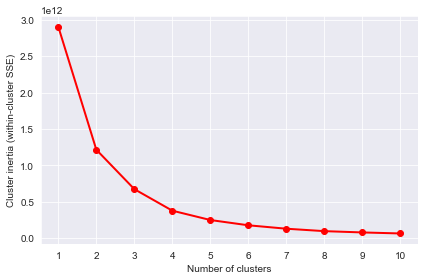

In [23]:
#Now we compute within-cluster SSE to determine optimal k
from sklearn.cluster import KMeans

inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df1)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, linewidth=2, color="red", marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

The most appropriate hyperparameter appears where the k value has a linear trend towards the last value or stops decreasing significantly. Therefore, according to the above plot, the optimal number of clusters
is 4. Now we can start fitting a copy of the original dataset into both desired models and determining which cluster each data is assigned to. 

In [24]:
km_plus = KMeans(n_clusters=4, 
            init='k-means++',  # use starndard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km_plus = km_plus.fit_predict(df1)
df1["Label"] = y_km_plus
#The current dataset with labels
df1.head() 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


In [25]:
km_plus.labels_

array([3, 0, 1, ..., 1, 3, 1])

In [26]:
km_plus.cluster_centers_

array([[3.05010893e-01, 4.37908497e-01, 4.09629630e+01, 1.20043573e+00,
        1.54064475e+05, 1.24836601e+00, 1.23747277e+00],
       [5.40372671e-01, 5.11387164e-01, 3.22318841e+01, 8.94409938e-01,
        7.90856128e+04, 1.53209110e-01, 1.63561077e-01],
       [2.85714286e-01, 4.00000000e-01, 4.45904762e+01, 1.34285714e+00,
        2.25124867e+05, 1.77142857e+00, 1.46666667e+00],
       [5.06820567e-01, 5.27806925e-01, 3.43819517e+01, 9.98950682e-01,
        1.14750034e+05, 8.26862539e-01, 7.10388248e-01]])

In [27]:
df1['Label'].value_counts()

3    955
1    483
0    457
2    105
Name: Label, dtype: int64

It is evident that each cluster has different number of entries. Specifically, while the third cluster is dominant, the second one has the smallest scope in comparison with others. Now we identify each cluster: 

In [28]:
#divide to 4 clusters
km_plus_c1 = df1[df1["Label"] == 0] 
km_plus_c2 = df1[df1["Label"] == 1] 
km_plus_c3 = df1[df1["Label"] == 2] 
km_plus_c4 = df1[df1["Label"] == 3] 

As building these different clusters is completed, different customer segments will be thoroughly assessed.

In [29]:
#Calculating averages of all features for each cluster
avg_df = df1.groupby(['Label'], as_index=False).mean()
avg_df

,Label,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0.301969,0.435449,40.927790,1.192560,154150.634573,1.249453,1.238512
1,1,0.540373,0.511387,32.231884,0.894410,79085.612836,0.153209,0.163561
2,2,0.285714,0.400000,44.590476,1.342857,225124.866667,1.771429,1.466667
3,3,0.507853,0.528796,34.412565,1.003141,114791.137173,0.827225,0.710995


#### 2.2. Hierarchical Clustering Technique

Using the number of clusters decided by KMeans Clustering, Hierarchical Clustering will be conducted with 4 clusters. 

In [30]:
df2 = df.copy()
df2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [31]:
from sklearn.cluster import AgglomerativeClustering

# ---------- 4 clusters --------------

ac = AgglomerativeClustering(n_clusters=4, 
                             affinity='euclidean', 
                             linkage='ward')
labels = ac.fit_predict(df2)
print('Cluster labels: %s' % labels)

Cluster labels: [3 2 1 ... 1 1 1]


In [32]:
df2['Labels'] = labels
df2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


In [33]:
#The number of entries per cluster
df2['Labels'].value_counts()

3    839
1    560
2    491
0    110
Name: Labels, dtype: int64

In [34]:
#Divide into 4 clusters 
hc_c1 = df2[df2["Labels"] == 0] 
hc_c2 = df2[df2["Labels"] == 1] 
hc_c3 = df2[df2["Labels"] == 2] 
hc_c4 = df2[df2["Labels"] == 3] 

In [35]:
#Calculating averages of all features for each cluster
avg_df2 = df2.groupby(['Labels'], as_index=False).mean()
avg_df2

,Labels,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0.290909,0.400000,44.727273,1.345455,223444.563636,1.745455,1.454545
1,1,0.558929,0.535714,31.907143,0.898214,81766.741071,0.239286,0.214286
2,2,0.311609,0.446029,40.702648,1.193483,152156.739308,1.228106,1.215886
3,3,0.495828,0.512515,34.618594,1.000000,115413.113230,0.824791,0.716329


#### Task 3: Clustering techniques comparison

Based on the average statistics of all clusters of both clustering techniques, they seem to have nearly equal results regardless of the order. Specifically, the mean values of ‘Marital status’ of all clusters are around 0.5 which cannot identify any type, this feature is not useful in describing a customer segment. Besides, as the mean values of ‘Education’ are approximately 1, we can assume that all customer segments have been high school educated.

Interpretation of four segments:
- `Segment 1`: it consists of middle-aged customers living in mid-sized cities with fairly high income.
- `Segment 2`: it consists of young customers with the average age of 32 who live in small cities and have the lowest income because of unemployment.
- `Segment 3`: this is the oldest segment with an average age of 45 and most of them are highqualified staff with the leading income but still stay in mid-sized cities.
- `Segment 4`: These customers seem to have an average value of each feature except the second youngest statistics so that this segment can be labeled standard. 

A way to assure the results provided by 2 algorithms is to produce scatterplot viewing 4 clusters:

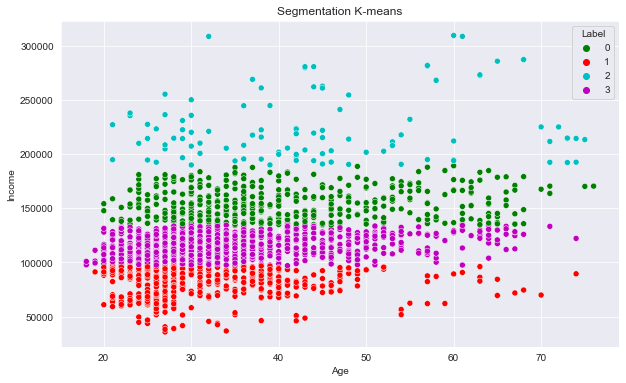

In [36]:
x_axis = df1['Age']
y_axis = df1['Income']
plt.figure(figsize = (10, 6))
sns.scatterplot(x_axis, y_axis, hue = df1['Label'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

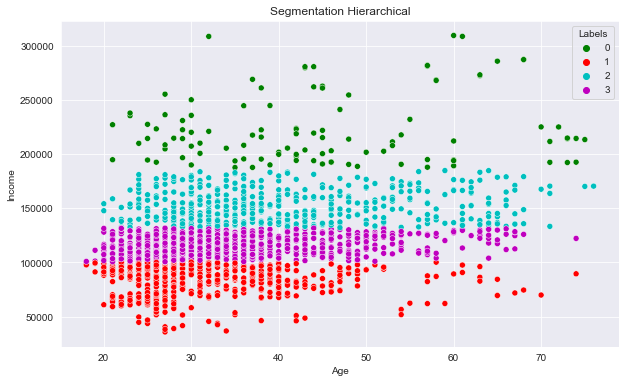

In [37]:
x_axis = df2['Age']
y_axis = df2['Income']
plt.figure(figsize = (10, 6))
sns.scatterplot(x_axis, y_axis, hue = df2['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation Hierarchical')
plt.show()